Let us assume that the equation we are trying to model is:

    y = 2x + 1

i.e.

    alpha = 2
    beta = 1
    
then, 

    y = alpha * x + beta

In [1]:
# Import Dependencies
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Build a Toy Dataset
x = [i for i in range(11)]
x

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [3]:
# Conver to numpy array
x_train = np.array(x, dtype=np.float32)
x_train

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.],
      dtype=float32)

In [4]:
x_train.shape

(11,)

In [5]:
# Reshape array to be a 2D array
x_train = x_train.reshape(-1,1)
x_train.shape

(11, 1)

In [6]:
# y values
y = [2*i + 1 for i in x]
y

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21]

In [7]:
# Convert to numpy and reshape
y_train = np.array(y, dtype=np.float32).reshape(-1,1)
y_train

array([[ 1.],
       [ 3.],
       [ 5.],
       [ 7.],
       [ 9.],
       [11.],
       [13.],
       [15.],
       [17.],
       [19.],
       [21.]], dtype=float32)

In [8]:
y_train.shape

(11, 1)

### Create Linear Regression Model

In [9]:
# Import Dependencies
import torch
import torch.nn as nn
from torch.autograd import Variable

In [10]:
# Linear Regression Class
class LinearRegressionModel(nn.Module):
    
    def __init__(self, input_dim, output_dim):
        # define super to inherit from nn.Module
        super(LinearRegressionModel, self).__init__()
        # define linear function where input_dim: "x" and output_dim: "y"
        self.linear = nn.Linear(input_dim, output_dim)
    
    # Forward Pass
    # Input: values in "x"
    # Return: estimated value of "y" i.e. "y_hat"
    def forward(self,x):
        out = self.linear(x)
        return out

In [11]:
# Instantiate the Model
model = LinearRegressionModel(input_dim=1, output_dim=1)

In [12]:
# Define the Loss Criteria
# Mean Squared Error loss
loss_criterion = nn.MSELoss()

In [13]:
# Learning Rate
lr = 0.01

# Optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=lr)

# Epochs
epochs = 200

In [14]:
# Train the Model
for epoch in range(epochs):
    
    # Define Training Inputs and Labels
    # Variable has "requires_grad = True" by default
    inputs = Variable(torch.from_numpy(x_train))
    labels = Variable(torch.from_numpy(y_train))
    
    # Clear gradients w.r.t parameters every epoch to avoid gradient accumulation
    optimizer.zero_grad()
    
    # Execute forward pass to get predicted values
    y_hat = model.forward(x=inputs)
    
    # Calculate the loss for forward pass
    loss = loss_criterion(y_hat,labels)
    
    # Backpropagate the gradients
    loss.backward()
    
    # Update the Parameters
    optimizer.step()
    
    print("Epoch: {0}\t Loss: {1}".format(epoch,loss.data[0]))

Epoch: 0	 Loss: 240.60531616210938
Epoch: 1	 Loss: 19.656198501586914
Epoch: 2	 Loss: 1.633733868598938
Epoch: 3	 Loss: 0.16335903108119965
Epoch: 4	 Loss: 0.043089259415864944
Epoch: 5	 Loss: 0.03294667229056358
Epoch: 6	 Loss: 0.031790781766176224
Epoch: 7	 Loss: 0.03137149661779404
Epoch: 8	 Loss: 0.031015964224934578
Epoch: 9	 Loss: 0.03066915273666382
Epoch: 10	 Loss: 0.030326660722494125
Epoch: 11	 Loss: 0.029987946152687073
Epoch: 12	 Loss: 0.029653111472725868
Epoch: 13	 Loss: 0.02932201698422432
Epoch: 14	 Loss: 0.028994593769311905
Epoch: 15	 Loss: 0.028670771047472954
Epoch: 16	 Loss: 0.02835063822567463
Epoch: 17	 Loss: 0.028034048154950142
Epoch: 18	 Loss: 0.027720982208848
Epoch: 19	 Loss: 0.027411408722400665
Epoch: 20	 Loss: 0.027105294167995453
Epoch: 21	 Loss: 0.02680269256234169
Epoch: 22	 Loss: 0.026503384113311768
Epoch: 23	 Loss: 0.02620740234851837
Epoch: 24	 Loss: 0.025914747267961502
Epoch: 25	 Loss: 0.025625400245189667
Epoch: 26	 Loss: 0.025339266285300255
Ep

/Users/anujdutt/miniconda3/envs/deeplearning/lib/python3.6/site-packages/ipykernel_launcher.py:24: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


In [15]:
# Get predictions from our trained model
predictions = model(Variable(torch.from_numpy(x_train))).data.numpy()
predictions

array([[ 1.1120979],
       [ 3.095955 ],
       [ 5.0798116],
       [ 7.0636683],
       [ 9.047525 ],
       [11.031383 ],
       [13.015239 ],
       [14.999096 ],
       [16.982954 ],
       [18.96681  ],
       [20.950668 ]], dtype=float32)

In [16]:
# Actual Labels
y_train

array([[ 1.],
       [ 3.],
       [ 5.],
       [ 7.],
       [ 9.],
       [11.],
       [13.],
       [15.],
       [17.],
       [19.],
       [21.]], dtype=float32)

### Plot Predictions

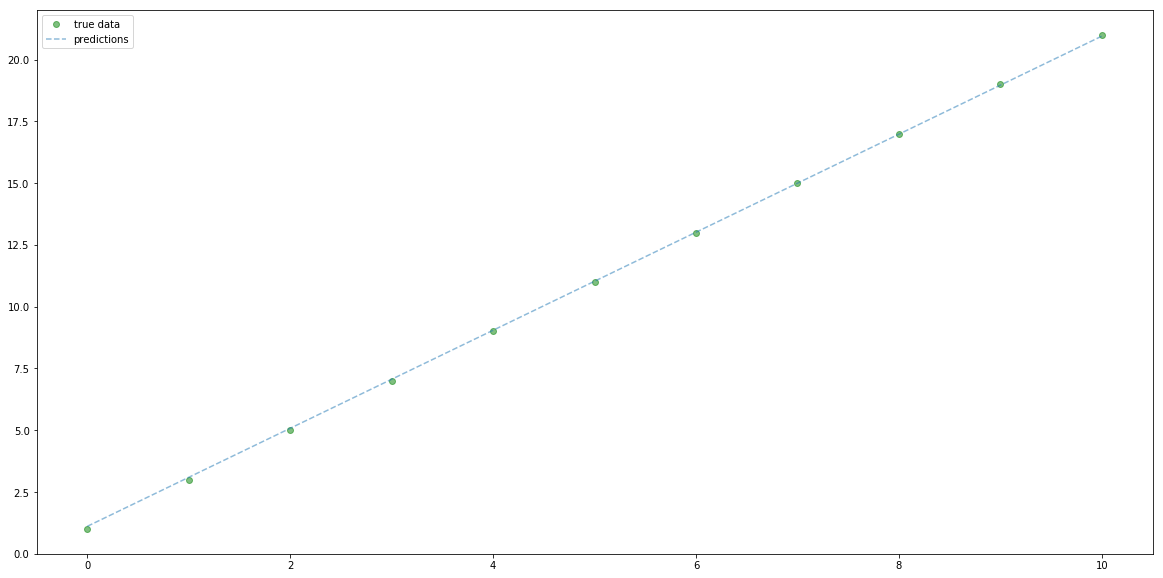

In [17]:
# Plot actual data vs predictions
plt.figure(figsize=(20,10))
plt.clf()

# Plot true data
plt.plot(x_train, y_train, 'go', label='true data', alpha=0.5)

# Plot predicted data
plt.plot(x_train,predictions, '--', label='predictions', alpha=0.5)

plt.legend()

### Save Trained Model

In [18]:
save_model = False

if save_model is True:
    # Save model parameters "alpha" and "beta"
    torch.save(model.state_dict(), './saved_models/linear_regression.pkl')

### Load Trained Model

In [19]:
load_model = False

if load_model is True:
    model.load_state_dict(torch.load('./saved_models/linear_regression.pkl'))

## Linear Regression Example

In [20]:
# Import Dependencies
import pandas as pd

In [21]:
# Load Sample Dataset
df = pd.read_csv('./dataset/Insurance-dataset.csv')
df.head()

,X,Y
0,108,392.5
1,19,46.2
2,13,15.7
3,124,422.2
4,40,119.4


In [22]:
# Features
X = np.array(df["X"], dtype=np.float64)

# Labels
y = np.array(df["Y"], dtype=np.float64)

In [23]:
X.size, y.size

(63, 63)

In [24]:
X[:10]

array([108.,  19.,  13., 124.,  40.,  57.,  23.,  14.,  45.,  10.])

In [25]:
y[:10]

array([392.5,  46.2,  15.7, 422.2, 119.4, 170.9,  56.9,  77.5, 214. ,
        65.3])

In [26]:
X = X.reshape(63,1)

In [27]:
X.shape

(63, 1)

In [28]:
type(X)

numpy.ndarray

In [29]:
y = y.reshape(63,1)

In [30]:
y.shape

(63, 1)

In [31]:
type(y)

numpy.ndarray

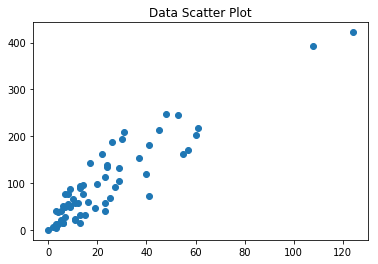

In [32]:
# Plot Data
plt.scatter(X,y)
plt.title("Data Scatter Plot");

In [33]:
# Convert Numpy Arrays to torch Tensors
X = torch.from_numpy(X)
y = torch.from_numpy(y)

In [34]:
type(X), type(y)

(torch.Tensor, torch.Tensor)

We know that for Linear Regression, the equation is:

    y = W * X + b

So, here we have values of "X" and "y". We need to find out the values of "W" and "b".

In [35]:
# Initialize Values of W and b
W = Variable(torch.rand(1, 1), requires_grad=True)
b = Variable(torch.rand(1), requires_grad=True)

In [36]:
# Define a function for linear Regression
def linearRegression(x):
    return torch.matmul(x,W) + b

In [37]:
# Define Inputs i.e. X and Y
X_t = Variable(X).float()
y_t = Variable(y).float()

In [38]:
X_t.shape

torch.Size([63, 1])

In [39]:
y_t.shape

torch.Size([63, 1])

In [40]:
W.shape

torch.Size([1, 1])

In [41]:
b.shape

torch.Size([1])

In [42]:
type(X_t), type(y_t)

(torch.Tensor, torch.Tensor)

In [43]:
# Train the Model

# Num epochs
epochs = 1000

# Learning Rate
lr = 0.0001

for epoch in range(epochs):
    # Compute initial predictions at output
    y_pred = linearRegression(X_t)
    
    # Compute Cost Function [Mean Squared Error]
    loss = torch.mean((y_pred - y_t)**2)
    
    # Do Backpropagation of gradients
    loss.backward()
    
    # Update Weight and Bias Values
    # theta = theta - learning_rate * gradient
    W.data = W.data - lr*W.grad.data
    b.data = b.data - lr*b.grad.data
    
    # Reset gradients
    W.grad.data.zero_()
    b.grad.data.zero_()
    
    if epoch%100 == 0:
        print("Epoch: {0}\t Loss: {1}".format(epoch,loss.data[0]))

Epoch: 0	 Loss: 15161.83984375
Epoch: 100	 Loss: 1438.557373046875
Epoch: 200	 Loss: 1434.7979736328125
Epoch: 300	 Loss: 1431.1141357421875
Epoch: 400	 Loss: 1427.5037841796875
Epoch: 500	 Loss: 1423.9658203125
Epoch: 600	 Loss: 1420.4990234375
Epoch: 700	 Loss: 1417.1011962890625
Epoch: 800	 Loss: 1413.7711181640625
Epoch: 900	 Loss: 1410.5081787109375


/Users/anujdutt/miniconda3/envs/deeplearning/lib/python3.6/site-packages/ipykernel_launcher.py:29: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


In [44]:
y_pred.data

tensor([[412.1276],
        [ 74.4788],
        [ 51.7160],
        [472.8285],
        [154.1487],
        [218.6435],
        [ 89.6540],
        [ 55.5098],
        [173.1178],
        [ 40.3345],
        [ 21.3655],
        [184.4992],
        [ 44.1283],
        [ 89.6540],
        [ 28.9531],
        [  9.9841],
        [ 93.4478],
        [ 25.1593],
        [ 13.7779],
        [ 89.6540],
        [ 25.1593],
        [ 36.5407],
        [ 36.5407],
        [ 13.7779],
        [112.4169],
        [ 28.9531],
        [ 17.5717],
        [ 78.2726],
        [ 28.9531],
        [ 17.5717],
        [  2.3965],
        [ 97.2416],
        [ 25.1593],
        [ 21.3655],
        [ 85.8602],
        [ 44.1283],
        [233.8187],
        [ 47.9222],
        [ 17.5717],
        [ 63.0974],
        [ 51.7160],
        [230.0249],
        [157.9426],
        [142.7673],
        [211.0558],
        [157.9426],
        [ 44.1283],
        [104.8293],
        [ 32.7469],
        [ 13.7779],


In [45]:
# Convert Predicted values to Numpy for plotting
y_hat = y_pred.data.numpy()
y_hat

array([[412.12762  ],
       [ 74.4788   ],
       [ 51.71596  ],
       [472.82852  ],
       [154.14874  ],
       [218.64346  ],
       [ 89.65402  ],
       [ 55.50977  ],
       [173.11777  ],
       [ 40.33454  ],
       [ 21.365505 ],
       [184.49919  ],
       [ 44.12835  ],
       [ 89.65402  ],
       [ 28.95312  ],
       [  9.984085 ],
       [ 93.44783  ],
       [ 25.159311 ],
       [ 13.777891 ],
       [ 89.65402  ],
       [ 25.159311 ],
       [ 36.540733 ],
       [ 36.540733 ],
       [ 13.777891 ],
       [112.41686  ],
       [ 28.95312  ],
       [ 17.5717   ],
       [ 78.272606 ],
       [ 28.95312  ],
       [ 17.5717   ],
       [  2.3964713],
       [ 97.24164  ],
       [ 25.159311 ],
       [ 21.365505 ],
       [ 85.86022  ],
       [ 44.12835  ],
       [233.81868  ],
       [ 47.922153 ],
       [ 17.5717   ],
       [ 63.09738  ],
       [ 51.71596  ],
       [230.02487  ],
       [157.94255  ],
       [142.76732  ],
       [211.05585  ],
       [15

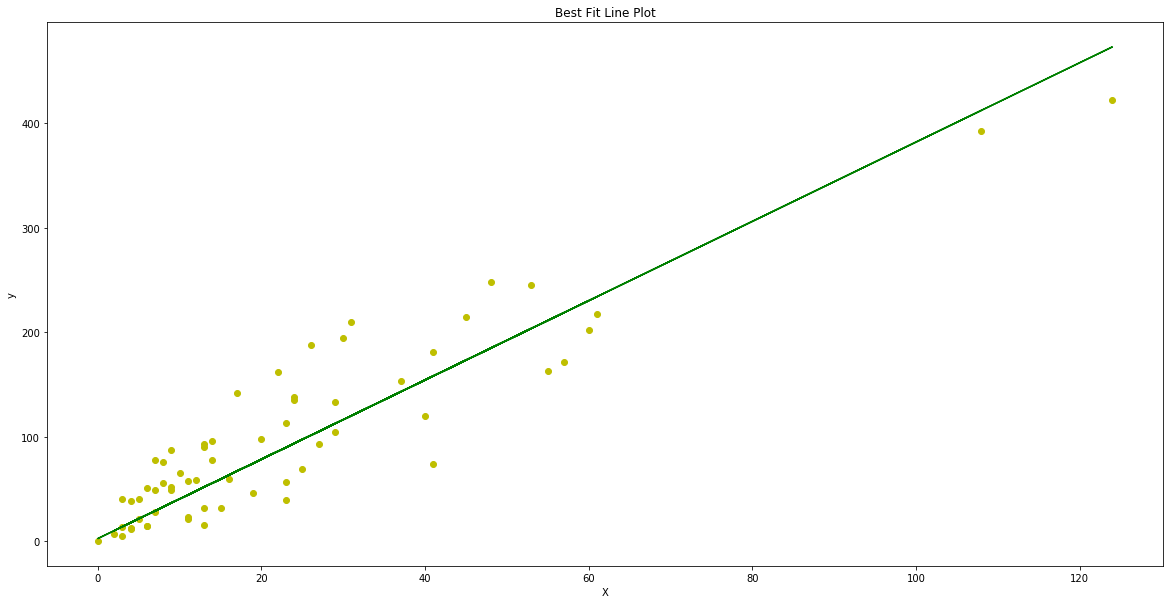

In [46]:
# Features
X = X.numpy()

# Labels
y = y.numpy()

fig,ax = plt.subplots(figsize=(20,10))
ax.scatter(X,y,c='y')
ax.plot(X,y_hat,c='g')
ax.set_xlabel('X')
ax.set_ylabel('y')
ax.set_title('Best Fit Line Plot');